In [1]:
# Core imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Local package
from titanic_tools.data import TitanicData
from titanic_tools.analysis import TitanicAnalysis



In [2]:
# Load raw data
data = TitanicData("../data/Titanic-Dataset.csv")
data.load()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Apply advanced cleaning
df_cleaned = data.clean_advanced()

# Show cleaned data
df_cleaned.head()


,passengerid,survived,pclass,sex,age,sibsp,parch,fare,has_cabin,family_size,is_alone,embarked_Q,embarked_S,title_Miss,title_Mr,title_Mrs,title_Rare
0,1,0,3,0,22.0,1,0,7.2500,0,2,0,False,True,False,True,False,False
1,2,1,1,1,38.0,1,0,71.2833,1,2,0,False,False,False,False,True,False
2,3,1,3,1,26.0,0,0,7.9250,0,1,1,False,True,True,False,False,False
3,4,1,1,1,35.0,1,0,53.1000,1,2,0,False,True,False,False,True,False
4,5,0,3,0,35.0,0,0,8.0500,0,1,1,False,True,False,True,False,False


In [4]:
# Check data types
df_cleaned.dtypes
# Check missing values
df_cleaned.isnull().sum()



passengerid    0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
has_cabin      0
family_size    0
is_alone       0
embarked_Q     0
embarked_S     0
title_Miss     0
title_Mr       0
title_Mrs      0
title_Rare     0
dtype: int64

In [5]:
# Create analysis instance
analysis = TitanicAnalysis(df_cleaned)


In [6]:
# Overall survival rate
analysis.survival_rate()


,overall_survival_rate
0,0.383838


E:\TU DORTMUND\python\titanic-tools\src\titanic_tools\analysis.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='survived', data=grouped, palette='muted')


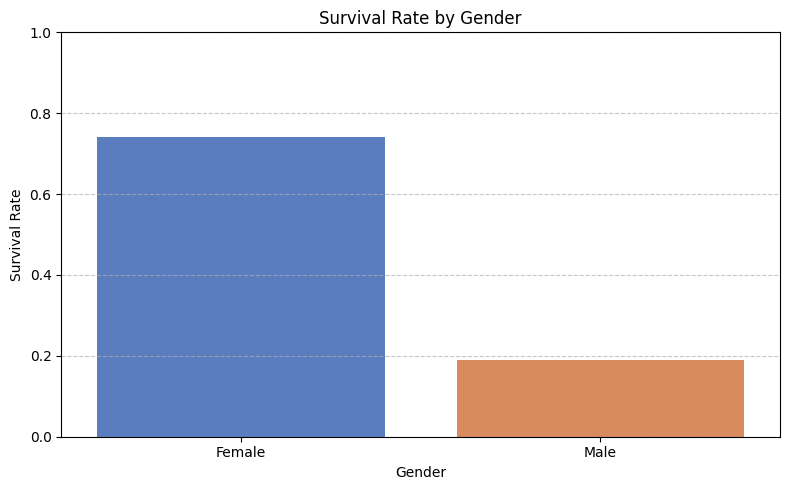

In [7]:
# If you want readable labels (optional)
df_cleaned['gender'] = df_cleaned['sex'].map({0: 'Male', 1: 'Female'})
analysis = TitanicAnalysis(df_cleaned)

# Survival rate by gender
analysis.plot_survival_by("gender")


E:\TU DORTMUND\python\titanic-tools\src\titanic_tools\analysis.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='survived', data=grouped, palette='muted')


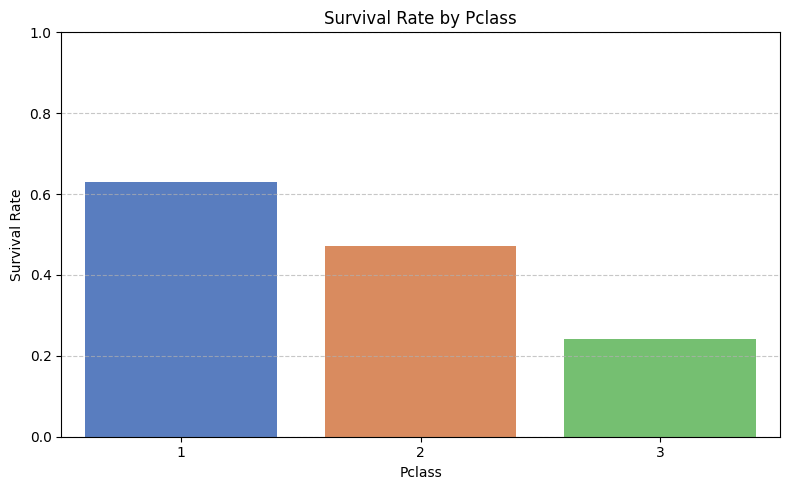

In [8]:
analysis.plot_survival_by("pclass")


E:\TU DORTMUND\python\titanic-tools\src\titanic_tools\analysis.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='survived', data=grouped, palette='muted')


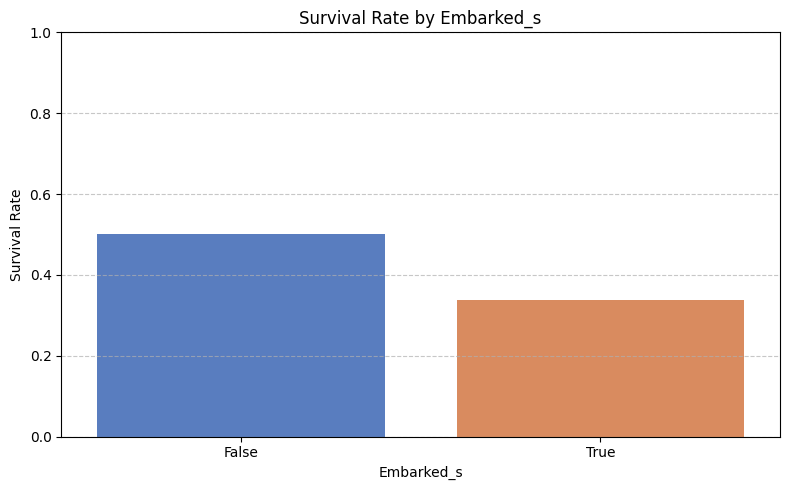

In [9]:
# Plot survival rate by embarkation port
analysis.plot_survival_by("embarked_S")  # or "embarked_Q", etc. depending on your one-hot columns


E:\TU DORTMUND\python\titanic-tools\src\titanic_tools\analysis.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = df.groupby('age_group')['survived'].mean().reset_index()
E:\TU DORTMUND\python\titanic-tools\src\titanic_tools\analysis.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='survived', data=survival_rates, palette='viridis')


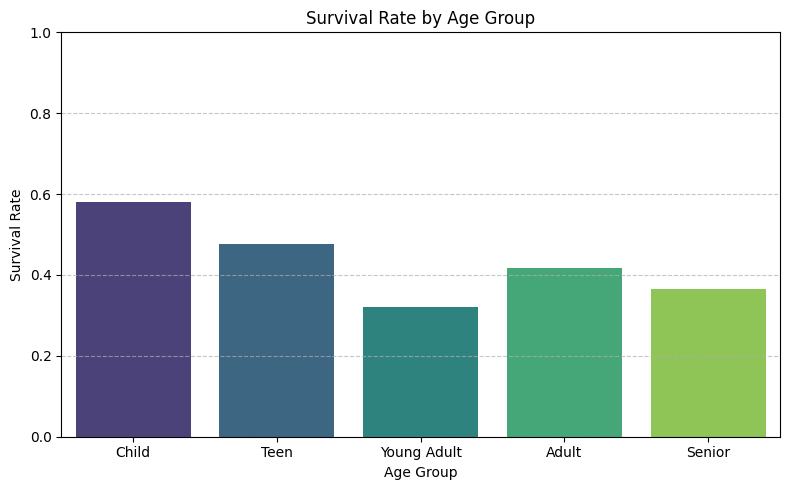

In [10]:
# Survival rate by binned age groups
analysis.plot_survival_by_age_group()


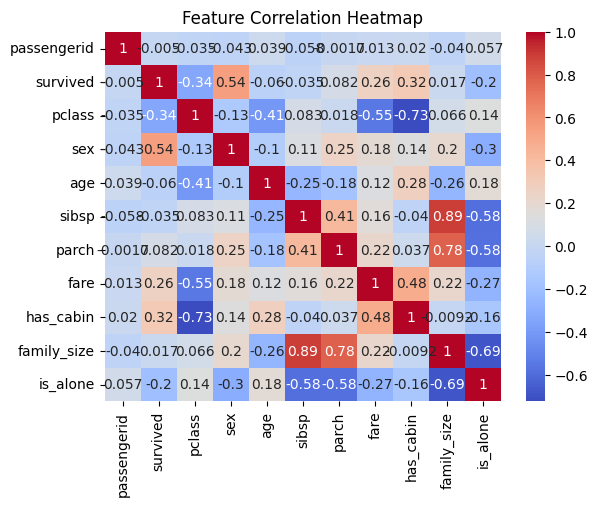

In [12]:
# Correlation heatmap (if you want to add this later)
sns.heatmap(df_cleaned.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [13]:
# Survival rate grouped by family size
analysis.survival_rate(by='family_size')


,family_size,survival_rate
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


E:\TU DORTMUND\python\titanic-tools\src\titanic_tools\analysis.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='survived', data=grouped, palette='muted')


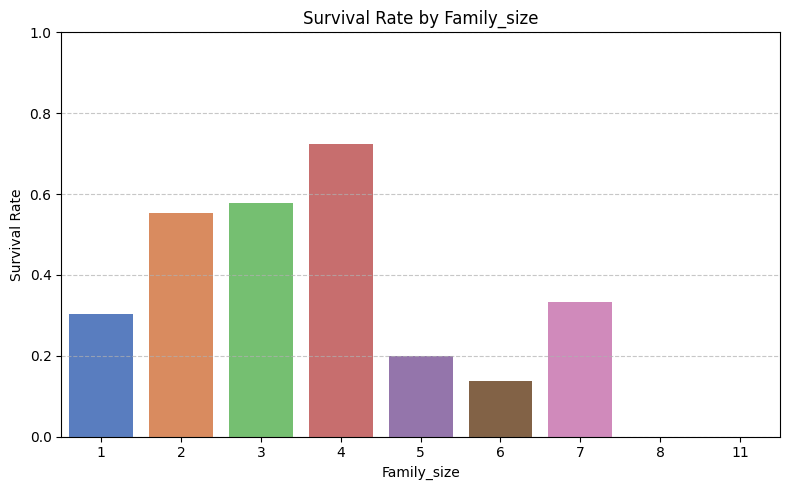

In [14]:
# Bar plot: survival rate by family size
analysis.plot_survival_by("family_size")


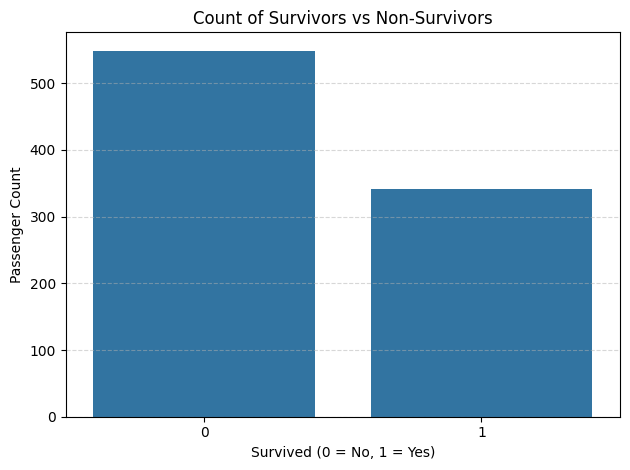

In [15]:
# Summary statistics
df_cleaned.describe()
# Countplot of survived vs not survived
sns.countplot(x='survived', data=df_cleaned)
plt.title("Count of Survivors vs Non-Survivors")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Passenger Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
